# Motivation


Often when I think about about climate change and what we might do to mitigate it I become forlorn with the hopelessness of it all. It seems so important and yet so insoluble.

Emitting large amounts of CO2 gives us an incredible lifestyle. When we emit there is no immediate feedback mechanism – no way for us to directly feel the cost of our emissions. What’s more, the cost is mostly born by other people. The big, immediate benefits and the lack of direct negative feedback make it hard to persuade ourselves, or our governments, to curb emissions. So hard in fact that I think it is tempting to give it up as a bad job and to get on with our lives. We feel like there is no chance our  governments and industries will make the changes needed to meet the Paris Agreement’s aim of limiting global warming to ‘well below 2°C above pre-industrial levels’ – and so we give up.

But we shouldn’t. Because 2°C is better than 3°C and 3°C is better than 4°C. I think this is a really key point that gets missed. The more CO2 that gets emitted, the hotter it gets and the worse the ramifications become. The late David Mackay – a hero of mine – described the area under a graph of CO2 emissions against time as being equal to ‘suffering’. The bigger the area, the more suffering. So we should do what we can to limit those emissions and the resulting suffering, even if we suspect that the temperature increase will  reach 2°C.

Before looking more into what action we should take I think its worth understanding where we are now. How much damage has climate change already done and how much more might it do? How are we doing in our efforts to reduce emissions? These questions (and my current unemployed and hence time-unlimited status) have prompted me to do some research and some data analysis. On the whole I’ve tried to use open source data sets to produce my own figures. On occasion I have failed to do so and so have replicated other people’s figures – in which case I say so in the caption.

In [1]:
# Let's start by reading in the data sets

In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import scipy.integrate as integrate  

In [3]:
#Import the historic emisisons data set
#data accessed on 23.08.17 from: http://edgar.jrc.ec.europa.eu/overview.php?v=CO2ts1990-2015
# Read in the data pertaining to global emissions only (the data set contains a country by country breakdown)
df_world_Gg = pd.read_csv('CO2_1970-2015_dataset_of_CO2_report_2016_edgar.csv', header = 11, index_col = 0, usecols = list(range(0,47)), skiprows = list(range(12,224)) , nrows = 1 )

In [4]:
#The source data is in Giga grams of CO2. I'm going to use Giga tonnes CO2 instead. 
# 1 tonne = 10^6 g

In [5]:
#Convert units to Gtonnes (divide by 10^6). 
df_world_Gt = df_world_Gg/(1000000)
#Print the output to check how the data is set up. 
df_world_Gt

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
World,15.861721,15.757156,16.553856,17.553838,17.497339,17.433822,18.433877,18.980196,19.625679,20.194019,...,30.795649,31.959132,32.132749,31.821632,33.660654,34.725783,34.968039,35.672051,36.084066,36.06171


In [6]:
#Now import the projection data
#data accessed on 24.08.17 from: https://tntcat.iiasa.ac.at/RcpDb/dsd?Action=htmlpage&page=download
#exclude the initial lines which are notes on the data
#Only import data for concentrations, forcing and CO2 emisssions (not other gas emmisions)
df_R26_PgC = pd.read_csv('R26_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
df_R45_PgC = pd.read_csv('R45_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
df_R60_PgC = pd.read_csv('R60_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
df_R85_PgC = pd.read_csv('R85_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))


In [7]:
#We are going to convert the data to Gtonees of CO2 a year from Pg (same as Gt) of C
#initialise the new dataframes.
df_R26_GtCO2 = df_R26_PgC
df_R45_GtCO2 = df_R45_PgC
df_R60_GtCO2 = df_R60_PgC
df_R85_GtCO2 = df_R85_PgC


In [8]:
#Now convert them: Molecular weight C is 12, and CO2 is 44
#keep heading columns the same, change unit column and adjust the numerical values according to (Mr(CO2))/(Mr(C))
df_R26_GtCO2.loc[:,'2000':'2100'] = df_R26_PgC.loc[:,'2000':'2100']*44/12
df_R26_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'

#R4.5
df_R45_GtCO2.loc[:,'2000':'2100'] = df_R45_PgC.loc[:,'2000':'2100']*44/12
df_R45_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'

#R60
df_R60_GtCO2.loc[:,'2000':'2100'] = df_R60_PgC.loc[:,'2000':'2100']*44/12
df_R60_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'

#R85
df_R85_GtCO2.loc[:,'2000':'2100'] = df_R85_PgC.loc[:,'2000':'2100']*44/12
df_R85_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'





In [9]:
#Check that the data looks as we expect
df_R26_GtCO2

,Region,Scenario,Variable,Unit,2000,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,R5ASIA,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,7.788000,11.198000,13.585000,15.931667,12.734333,8.272000,5.540333,1.991000,0.018333,-0.755333,-1.309000,-0.638000
1,R5LAM,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,2.698667,2.761000,2.951667,2.533667,2.005667,1.708667,1.400667,1.158667,0.748000,0.480333,0.447333,0.128333
2,R5MAF,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,3.032333,3.439333,3.182667,4.176333,3.835333,2.794000,2.123000,2.669333,2.123000,1.529000,0.924000,0.315333
3,R5OECD,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,12.162333,12.738000,13.156000,11.949667,8.477333,4.326667,2.269667,0.968000,-0.707667,-0.876333,-0.975333,-1.195333
4,R5REF,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,3.226667,3.479667,3.347667,3.028667,2.079000,1.320000,1.081667,0.671000,0.216333,0.051333,-0.066000,-0.146667
5,World,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,28.908000,33.612333,36.219333,37.620000,29.135333,18.421333,12.419000,7.461667,2.398000,0.429000,-0.982667,-1.540000
6,R5ASIA,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,6.482667,9.562667,12.045000,14.725333,12.059667,7.971333,5.148000,1.499667,-0.403333,-1.221000,-1.837000,-1.111000
7,R5LAM,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,1.360333,1.510667,1.686667,1.807667,1.441000,1.257667,1.224667,0.854333,0.469333,0.209000,-0.007333,-0.223667
8,R5MAF,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,2.130333,2.603333,2.779333,2.940667,2.533667,2.266000,2.170667,2.013000,1.591333,1.070667,0.594000,0.165000
9,R5OECD,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,11.700333,12.276000,12.653667,11.652667,8.231667,3.978333,2.266000,0.407000,-1.144000,-1.353000,-1.481333,-1.661000


In [10]:
#We want to look at the data over a both short and long timescales. 
#Define variables for the limits of those timescales so that we can easily change them. 
start_year_scen_big = '2000'
end_year_scen_big = '2100'
start_year_hist_big = '1970'
end_year_hist_big = '2015'

In [11]:
start_year_scen_small = '2000'
end_year_scen_small = '2030'
start_year_hist_small = '2000'
end_year_hist_small = '2015'

In [12]:
# Define lists of values to plot (take out of pandas as plotting different x-axes)
#Historic data - long time scale
#y values (emissions)
historic = df_world_Gt.loc['World', start_year_hist_big : end_year_hist_big].T.as_matrix().T 
# x values (years)
x_hist=[int(xx) for xx in list(df_world_Gt.loc[:, start_year_hist_big : end_year_hist_big])] 

In [13]:
#Historic data - short time scale
#y values (emissions)
historic_small = df_world_Gt.loc['World', start_year_hist_small : end_year_hist_small].T.as_matrix().T 
# x values (years)
x_hist_small=[int(xx) for xx in list(df_world_Gt.loc[:, start_year_hist_small : end_year_hist_small])] 


In [14]:
#Scenario data - long time scales
# y values. Row 11 is The world data for CO2 emissions from industry and fossil fuel burning. 
RF2_6 = list(df_R26_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
RF4_5 = list(df_R45_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
RF6_0 = list(df_R60_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
RF8_5 = list(df_R85_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
#x values
x_scen = [int(xx) for xx in list(df_R26_GtCO2.loc[:, start_year_scen_big:end_year_scen_big])]


In [15]:
#Scenario data - short time scales
# y values. Row 11 is The world data for CO2 emissions from industry and fossil fuel burning. 
RF2_6_small = list(df_R26_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
RF4_5_small = list(df_R45_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
RF6_0_small = list(df_R60_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
RF8_5_small = list(df_R85_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
#x values
x_scen_small = [int(xx) for xx in list(df_R26_GtCO2.loc[:, start_year_scen_small:end_year_scen_small])]



In [16]:
#Ok - We have our data set up. Ready to plot some graphs

# Climate impacts

The Intergovernmental Panel on Climate Change’s [latest report](https://www.ipcc.ch/pdf/assessment-report/ar5/syr/SYR_AR5_FINAL_full_wcover.pdf) and the recently publicized US Global Change Programme’s [Climate Science Special Report](http://www.nytimes.com/packages/pdf/climate/2017/climate-report-final-draft-clean.pdf?mcubz=1) describe the impacts that climate change has already had. These include: a temperature increase of about 0.78°C from the period 1850–1900 to the period 2003–2012 (IPCC); a global mean sea level rise of about 19 cm over the period 1901–2010 (IPCC); and an increasing intensity and frequency of extreme temperatures and heavy precipitation events in most continental regions of the world (USGCP).

These reports also include projections of what impacts climate change will have in the future under different emissions scenarios. The IPCC uses four scenarios called “Representative Concentration Pathways” (RCPs). These are RCP2.6, RCP 4.5, RCP 6.0 and RCP 8.5. The numbers in the names represent ‘radiative forcing’ – a measure of how the gases in the atmosphere affect the balance between the energy absorbed by the Earth and the energy radiated back out to space. The bigger the number, the bigger the ratio of radiation in to radiation out – so the hotter it gets.  Specifically the numbers relate to what the radiative forcing would be in 2100 in each scenario. Annual CO2 emissions from fossil fuel use and industry under each of the 4 scenarios are shown below.

In [17]:
#Set the default parameters for all plots
params = {'legend.fontsize': 16,
          'figure.figsize': (12, 12),
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

/Users/stephaniewillis/.virtualenvs/python3/lib/python2.7/site-packages/matplotlib/patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


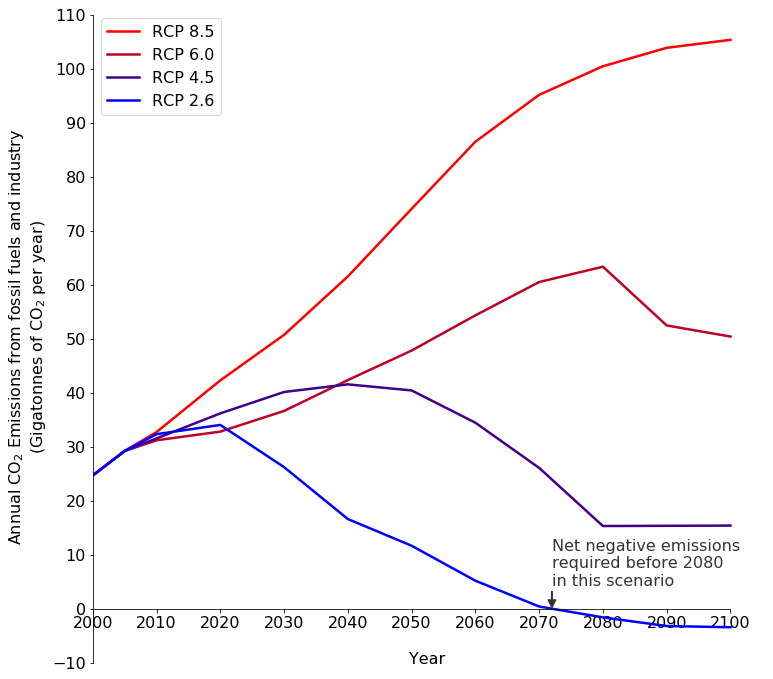

In [18]:
#RCP's only 

#Set up the plot
fig_area_scen, ax_area_scen = plt.subplots()

#plot future scenarios
ax_area_scen.plot(x_scen, RF8_5, label = 'RCP 8.5', color = (1, 0, 0), linewidth = 2.5)
ax_area_scen.plot(x_scen, RF6_0, label = 'RCP 6.0', color = (0.75, 0, 0.15), linewidth = 2.5 )
ax_area_scen.plot(x_scen, RF4_5, label = 'RCP 4.5', color = (0.25, 0, 0.55), linewidth = 2.5 )
ax_area_scen.plot(x_scen, RF2_6, label = 'RCP 2.6', color = (0, 0, 1), linewidth = 2.5 )

#Set the minimum x value to the first year that is being plotted
pylab.xlim(xmin= int(start_year_scen_big))

#Define the spines so that the x axis is at y = 0 and the axes are a neat length
ax_area_scen.spines['bottom'].set_position('zero')
ax_area_scen.spines['left'].set_smart_bounds(True)
ax_area_scen.spines['bottom'].set_smart_bounds(True)

#Get rid of lines to right and top 
ax_area_scen.spines['right'].set_color('none')
ax_area_scen.spines['top'].set_color('none')


#Add legend and annotations
ax_area_scen.legend()

ax_area_scen.annotate('Net negative emissions \nrequired before 2080 \nin this scenario',
            color = '0.2',
            fontsize = 16,
            xy=(2072,0), 
            xytext=(2072, 13), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 8, headlength = 8, color = '0.2' ),
            horizontalalignment='left',
            verticalalignment='top')

 
                      
#Label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO_{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO_{2}}$ per year)')
plt.xticks(np.arange(min(x_scen), 2109, 10))
plt.yticks(np.arange(-10, max(RF8_5)+10, 10))

#plt.savefig('RCP_scenarios.png')
                      

plt.show()



*Annual emissions of CO2 from fossil fuels and industry under the 4 RCP scenarios. Data and citations for scenario development [here](https://tntcat.iiasa.ac.at/RcpDb/dsd?Action=htmlpage&page=download).*

In RCP 8.5 annual CO2 emissions continue to increase. High population and modest rates of technological change result in long term high demand and high emissions.

In RCP 6.0 annual CO2 emissions peak in 2080 and then decline. Population stabilizes, growth is relatively slow and the energy intensity of the economy (CO2 emitted/$) gradually improves.

In RCP 4.5 annual CO2 emissions peak in 2040 and then decline. The slow growth and then reduction in emissions is achieved through large scale adoption of Nuclear power and Carbon Capture and Storage (CCS) as well as significant reforestation.

In RCP 2.6 annual CO2 emissions peak in 2020 and then decline, becoming negative after 2070. This scenario relies heavily on the use of CCS and biofuels to allow carbon negative power generation (by growing plants, burning them and then capturing and storing the CO2 emitted in the process). This is an unproven technology.

The likely projected global temperature changes under each of the RCP's are shown in the figures below. The temperature changes shown are relative to the 1986–2005 average. It is worth mentioning that this is not the 'pre-industrial' baseline to which the Paris Agreement refers. I looked a little more into what the 'pre-industrial' baseline is and wrote about it [here](https://concerningclimate.wordpress.com/2017/08/30/whats-the-baseline/). The conclusion is that we need to add somewhere between 0.55°C and 0.8°C to the temperature changes reported below if we want them to be relative to pre-industrial levels.


![alt text](SPM.06-01_adapted.png "Title")
*Projected global temperature increase relative to 1986–2005 under each of the emissions scenarios as determined by multi model simulations. Time series are shown on the left for RCP 2.6 and RCP 8.5. On the right the projected temperature change to the period 2081–2100 is shown for all 4 scenarios.   The solid line indicates the mean of multiple different models and the shading indicates the 5 to 95% range of the model outputs.  This plot is taken directly from the IPCC's [latest report](https://www.ipcc.ch/pdf/assessment-report/ar5/syr/SYR_AR5_FINAL_full_wcover.pdf) as I was unable to find a tractable data set from which to make my own plot.*


![alt text](RCP_temp_summaries_cropped.png "Title")

*Projected global temperature increase (°C) from 1986–2005 to 2081–2100 under the 4 scenarios. This table summarizes the key numbers from the plot above. 'Mean' in this context refers to the average result of many different climate models. The likely range of temperatures under each scenario is shown on the right. The IPCC uses the word 'likely' to describe something which has a greater than 66% probability of happening.*

Adding between 0.55°C and 0.8°C to the reported temperature changes we see that, even if we follow RCP2.6, we might well exceed 2°C of warming by 2010. The scale and speed of warming under the higher emissions scenarios is terrifying. I don't have a good idea of what a further 3.7°C of warming by 2100 would look like but I do have some grasp of the suffering that 0.78°C of warming is already causing ([famine](https://www.nytimes.com/2017/03/27/world/africa/famine-somalia-nigeria-south-sudan-yemen-water.html?mcubz=1), [flooding](https://psmag.com/environment/how-climate-change-contributed-to-massive-floods-in-south-asia), [fires](http://www.dw.com/en/how-climate-change-is-increasing-forest-fires-around-the-world/a-19465490), [hurricanes](https://www.bloomberg.com/news/articles/2017-09-06/hurricane-irma-was-made-worse-by-climate-change-scientists-say)). Looking at those temperature estimates I vehemently hope that we are well clear of RCP 8.5. With that in mind, let's have a look at the data. For the past few years there has undoubtedly been efforts to reduce our CO2 emissions - what impact have they had? Which scenario do we seem to be following?


# Reality check

The RCP scenarios start in 2000. Detailed data on CO2 emissions from fossil fuels and industry is available up to 2015.  We therefore have 15 years of overlap between historical data and ‘future scenarios’. That overlap allows us to figure out how reality has shaped up compared to the scenarios. In the figure below I have plotted historical emissions against the predicted emissions for each of the 4 scenarios. I have replaced the scenario names with the mean temperature increase estimate for each scenario (from  the table above). I find temperature change estimates far more understandable than radiative forcing estimates.


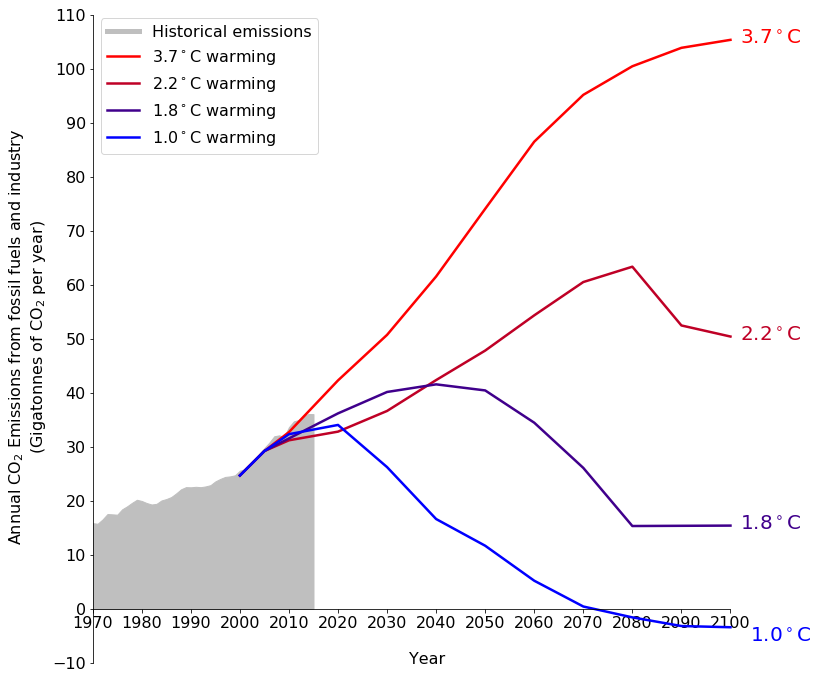

In [19]:
#Now compare scenarios to reality. 
#Big scale plot - 1970 to 2100

#Set up the plot
fig_area_comp, ax_area_comp = plt.subplots()

#plot historical emissions as an area. Include an empty series of the same colour to give a legend entry
ax_area_comp.stackplot(x_hist, historic, color = '0.75')
ax_area_comp.plot([], [], label = 'Historical emissions', color = '0.75', linewidth = 5)

#plot future scenarios
ax_area_comp.plot(x_scen, RF8_5, label = '3.7$^\circ$C warming', color = (1, 0, 0), linewidth = 2.5)
ax_area_comp.plot(x_scen, RF6_0, label = '2.2$^\circ$C warming', color = (0.75, 0, 0.15), linewidth = 2.5 )
ax_area_comp.plot(x_scen, RF4_5, label = '1.8$^\circ$C warming', color = (0.25, 0, 0.55), linewidth = 2.5 )
ax_area_comp.plot(x_scen, RF2_6, label = '1.0$^\circ$C warming', color = (0, 0, 1), linewidth = 2.5 )

#Set the minimum x value to the first year that is being plotted
pylab.xlim(xmin= int(start_year_hist_big))

#Define the spines so that the x axis is at y = 0 and the axes are a neat length
ax_area_comp.spines['bottom'].set_position('zero')
ax_area_comp.spines['left'].set_smart_bounds(True)
ax_area_comp.spines['bottom'].set_smart_bounds(True)
ax_area_comp.xaxis.set_ticks_position('bottom')
ax_area_comp.yaxis.set_ticks_position('left')

#Get rid of lines on right and top 
ax_area_comp.spines['right'].set_color('none')
ax_area_comp.spines['top'].set_color('none')


#Add legend and annotations
ax_area_comp.legend()


ax_area_comp.annotate('1.0$^\circ$C',
            color = (0, 0, 1),
            fontsize = 20,
            xy=(2102,0),  
            xytext=(2104, RF2_6[11]), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('1.8$^\circ$C',
            color = (0.25, 0, 0.55),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2102, RF4_5[11]+ 2), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('2.2$^\circ$C',
            color = (0.75, 0, 0.15),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2102, RF6_0[11]+2), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0 ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('3.7$^\circ$C',
            color = (1, 0, 0),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2102, RF8_5[11] + 2), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')
                                
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO_{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO_{2}}$ per year)')
plt.xticks(np.arange(min(x_hist), 2109, 10))
plt.yticks(np.arange(-10, max(RF8_5)+10, 10))

#plt.savefig('scenarios_vs_reality.png')

plt.show()

*Comparison of [historical](http://edgar.jrc.ec.europa.eu/overview.php?v=CO2ts1990-2015) and [projected](https://tntcat.iiasa.ac.at/RcpDb/dsd?Action=htmlpage&page=download) annual CO2 emissions from fossil fuel use and industry. Each scenario is labelled with the average predicted increase in temperature between the period 1986–2005 and the period 2081–2100 under that scenario. For a explanation of why only emissions from fossil fuels and industry are being analyzed see the end of this article.*

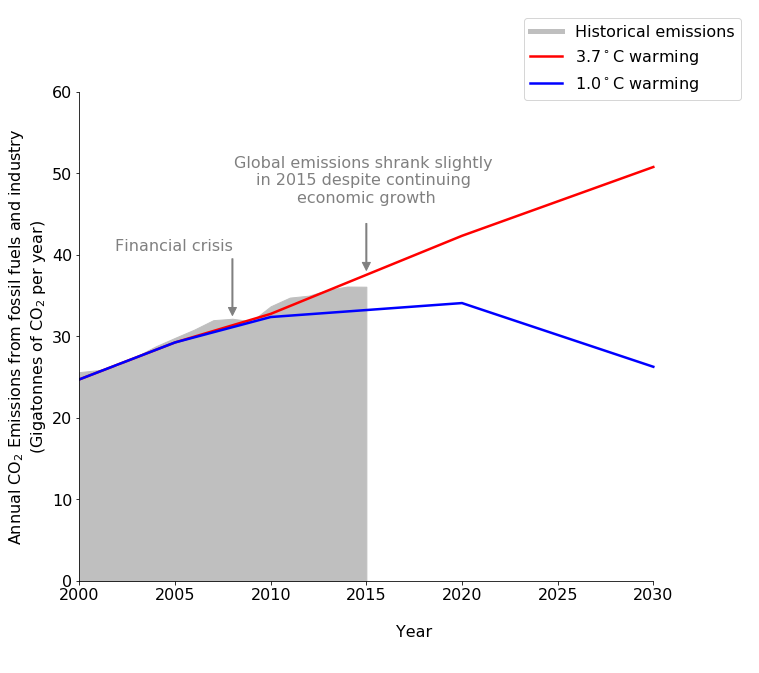

In [20]:
#Small scale plot - 2000 to 2030

#Set up the plot
fig_area_comp_small, ax_area_comp_small = plt.subplots()

#plot historical emissions as an area. Include an empty series of the same colour to give a legend entry
ax_area_comp_small.stackplot(x_hist_small, historic_small, color = '0.75')
ax_area_comp_small.plot([], [], label = 'Historical emissions', color = '0.75', linewidth = 5)

#Plot only the two extreme scenarios for clarity 
ax_area_comp_small.plot(x_scen_small, RF8_5_small, label = '3.7$^\circ$C warming', color = (1, 0, 0), linewidth = 2.5)
ax_area_comp_small.plot(x_scen_small, RF2_6_small, label = '1.0$^\circ$C warming', color = (0, 0, 1), linewidth = 2.5 )


#Set the minimum x value to the first year that is being plotted
pylab.xlim(xmin= int(start_year_hist_small))

#Define the spines so that the x axis is at y = 0 and the axes are a neat length
ax_area_comp_small.spines['bottom'].set_position('zero')
ax_area_comp_small.spines['left'].set_smart_bounds(True)
ax_area_comp_small.spines['bottom'].set_smart_bounds(True)

#Get rid of lines on right and top 
ax_area_comp_small.spines['right'].set_color('none')
ax_area_comp_small.spines['top'].set_color('none')

#Add legend and annotations
ax_area_comp_small.legend()
ax_area_comp_small.annotate('Financial crisis',
                    fontsize = 16,
                    color = '0.5',
                    xy=(2008,df_world_Gt.loc['World','2008']),  # In the year 2008
                    xytext=(2008, df_world_Gt.loc['World','2008']+ 8), 
                    textcoords='data',
                    arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 8, headlength = 8, color = '0.5' ),
                    horizontalalignment='right',
                    verticalalignment='bottom')

ax_area_comp_small.annotate('Global emissions shrank slightly \nin 2015 despite continuing \neconomic growth',
            fontsize = 16,
            color = '0.5',
            xy=(2015,df_world_Gt.loc['World','2015']),  # In the year 2008
            xytext=(2015, df_world_Gt.loc['World','2015']+ 10), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.2, width = 1, headwidth = 8, headlength = 8, color = '0.5' ),
            horizontalalignment='center',
            verticalalignment='bottom')

                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO_{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO_{2}}$ per year)')
plt.xticks(np.arange(2000, 2040, 5))
plt.yticks(np.arange(-10, max(RF8_5_small)+20, 10))

#plt.savefig('scenarios_vs_reality_zoomed.png')

                    
plt.show()


    

*A zoomed in look at the previous figure. The intermediate emissions scenarios have been omitted for clarity.*

Depressingly it looks like Global CO2 emissions have largely followed the RCP 8.5 - unabated growth scenario. Recently however, emissions growth has slowed and diverged from the RCP 8.5 scenario. In 2015 CO2 emissions [decreased by 0.1% despite a 3% increase in GDP](http://edgar.jrc.ec.europa.eu/news_docs/jrc-2016-trends-in-global-co2-emissions-2016-report-103425.pdf) so it would appear that efforts to decarbonize are having some impact.

The exact trajectory of our annual emissions need not follow any of these scenarios exactly - they are merely indicative of some possible futures. The most important thing is the quantity of CO2 emitted overall - not the exact way our emissions change over time. The plot below shows cumulative emissions since 2000 compared to the cumulative emissions in each scenario.

In [21]:
#The most important thing (more or less) is cumulative emissions so lets have a look at those

#Cumulatively sum the historic emissions data - use 01.01.2000 as a starting point as that is where scenarios start
# Points will be plotted at the start of each year so add 0 at the start for emissions between 01.01.2000 and 01.01.2000
cum_hist = [0] + list(np.cumsum(historic_small))
#Add another year to the time series (because emissions up to the end of 2015 are emissions to the start of 2016)
x_hist_cum = list(range(int(start_year_hist_small), int(end_year_hist_small)+2))

#Use the trapezium rule to integrate the scenario data. The scenario data gives average values for certain years. 
#We are taking the annual averages as being at the midpoint of the year and integrating betweeen them. 
#As such the first half of the year 2000 is missed and so needs to be added hence the 0.5*RF2_6[0]
cum_RF2_6 = 0.5*RF2_6[0] + integrate.cumtrapz(RF2_6, x_scen )
cum_RF4_5 = 0.5*RF4_5[0] + integrate.cumtrapz(RF4_5, x_scen)
cum_RF6_0 = 0.5*RF6_0[0] +  integrate.cumtrapz(RF6_0, x_scen)
cum_RF8_5 = 0.5*RF8_5[0] + integrate.cumtrapz(RF8_5, x_scen)
#plot values half way through the year
x_scen_cum = [2005.5, 2010.5, 2020.5, 2030.5, 2040.5, 2050.5, 2060.5, 2070.5, 2080.5, 2090.5, 2100.5]


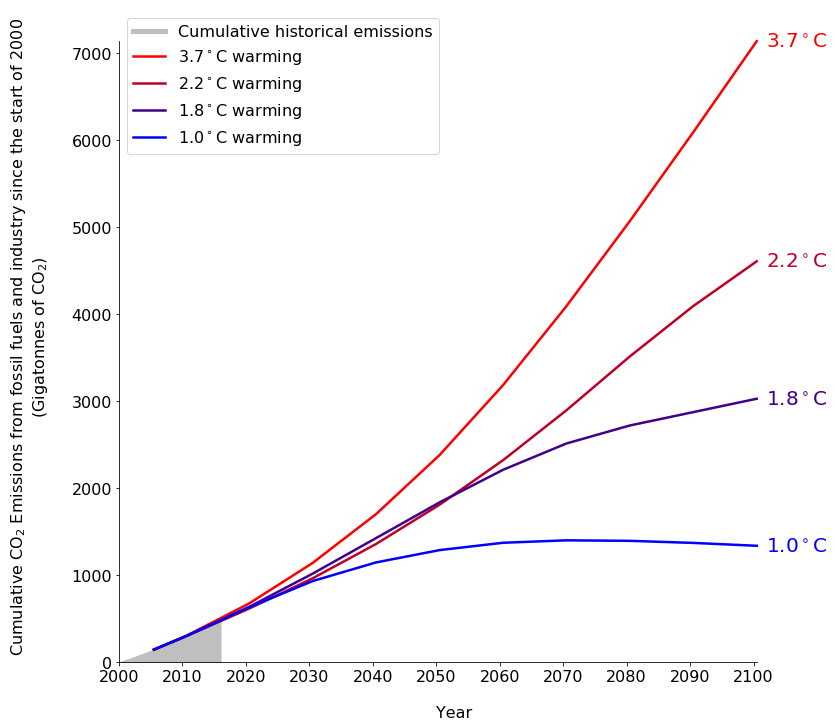

In [22]:
#Set up the plot
fig_cum, ax_cum = plt.subplots()

#plot historical emissions
ax_cum.stackplot( x_hist_cum, cum_hist, color = '0.75')
ax_cum.plot([], [], label = 'Cumulative historical emissions', color = '0.75', linewidth = 5)

#plot scenario emissions
ax_cum.plot(x_scen_cum, cum_RF8_5, label = '3.7$^\circ$C warming', color = (1, 0, 0), linewidth = 2.5)
ax_cum.plot(x_scen_cum, cum_RF6_0, label = '2.2$^\circ$C warming', color = (0.75, 0, 0.15), linewidth = 2.5 )
ax_cum.plot(x_scen_cum, cum_RF4_5, label = '1.8$^\circ$C warming', color = (0.25, 0, 0.55), linewidth = 2.5 )
ax_cum.plot(x_scen_cum, cum_RF2_6, label = '1.0$^\circ$C warming', color = (0, 0, 1), linewidth = 2.5 )


#Adjust the minimum values on each axes
pylab.xlim(xmin= 2000)
pylab.ylim(ymin= 0)

#Define the spines so that the x axis is at y = 0 and the axes are a neat length
ax_cum.spines['bottom'].set_position('zero')
ax_cum.spines['left'].set_smart_bounds(True)
ax_cum.spines['bottom'].set_smart_bounds(True)

#Get rid of lines on right and top 
ax_cum.spines['right'].set_color('none')
ax_cum.spines['top'].set_color('none')

#Add legend and annotations
ax_cum.legend()
ax_cum.annotate('1.0$^\circ$C',
            color = (0, 0, 1),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2102, cum_RF2_6[10]+ 100), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')

ax_cum.annotate('1.8$^\circ$C',
            color = (0.25, 0, 0.55),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2102, cum_RF4_5[10]+ 100), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')

ax_cum.annotate('2.2$^\circ$C',
            color = (0.75, 0, 0.15),
            fontsize = 20,
            xy=(2101,0),  
            xytext=(2102, cum_RF6_0[10]+100), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0 ),
            horizontalalignment='left',
            verticalalignment='top')

ax_cum.annotate('3.7$^\circ$C',
            color = (1, 0, 0),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2102, cum_RF8_5[10] + 100), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')
            

                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Cumulative $\mathregular{CO_{2}}$ Emissions from fossil fuels and industry since the start of 2000 \n(Gigatonnes of $\mathregular{CO_{2}}$)\n')
plt.xticks(np.arange(2000, 2101, 10))
#plt.yticks(np.arange(0,701,100))

#plt.savefig('cumulative_scenarios_vs_reality.png')



                    
plt.show()

*Comparison of [historical](http://edgar.jrc.ec.europa.eu/overview.php?v=CO2ts1990-2015) and [projected](https://tntcat.iiasa.ac.at/RcpDb/dsd?Action=htmlpage&page=download)cumulative CO2 emissions from fossil fuel use and industry. Each scenario labelled with the average predicted increase in temperature between the period 1986–2005 and the period 2081–2100 under that scenario. See below for a more zoomed in version.*

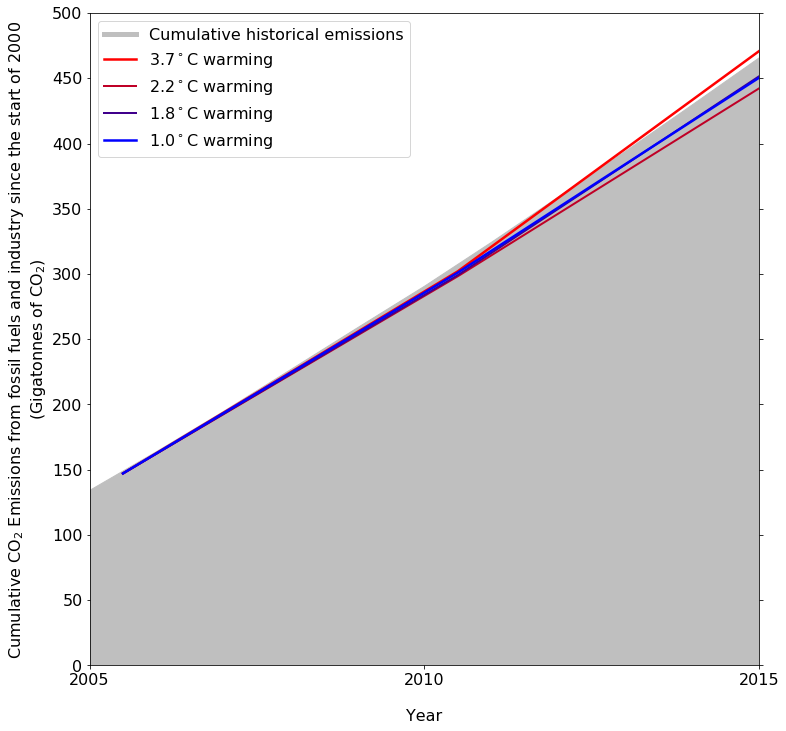

In [23]:
#Zoomed in version
#Set up the plot
fig_cum_small, ax_cum_small = plt.subplots()

#plot historical emissions
ax_cum_small.stackplot( x_hist_cum, cum_hist, color = '0.75')
ax_cum_small.plot([], [], label = 'Cumulative historical emissions', color = '0.75', linewidth = 5)

#plot scenario emissions
ax_cum_small.plot(x_scen_cum, cum_RF8_5, label = '3.7$^\circ$C warming', color = (1, 0, 0), linewidth = 2.5)
ax_cum_small.plot(x_scen_cum, cum_RF6_0, label = '2.2$^\circ$C warming', color = (0.75, 0, 0.15), linewidth = 2 )
ax_cum_small.plot(x_scen_cum, cum_RF4_5, label = '1.8$^\circ$C warming', color = (0.25, 0, 0.55), linewidth = 2 )
ax_cum_small.plot(x_scen_cum, cum_RF2_6, label = '1.0$^\circ$C warming', color = (0, 0, 1), linewidth = 2.5 )


#Adjust the minimum values on each axes
pylab.xlim(xmin= 2005, xmax = 2015)
pylab.ylim(ymin= 0, ymax = 500)

#Define the spines so that the x axis is at y = 0 and the axes are a neat length
ax_cum_small.spines['bottom'].set_position('zero')
ax_cum_small.spines['left'].set_smart_bounds(True)
ax_cum_small.spines['bottom'].set_smart_bounds(True)

#Put ticks on the left hand axis too to make it easier to judge the difference between the lines
ax_cum_small.yaxis.set_ticks_position('both')

#Get rid of lines at top 
ax_area_scen.spines['top'].set_color('none')


#Add legend and annotations
ax_cum_small.legend()
#ax_cum_small.grid(axis = 'y')
                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Cumulative $\mathregular{CO_{2}}$ Emissions from fossil fuels and industry since the start of 2000 \n(Gigatonnes of $\mathregular{CO_{2}}$)')
plt.xticks(np.arange(2005, 2016, 5))
plt.yticks(np.arange(0,501,50))

#plt.savefig('cumulative_scenarios_vs_reality_zoomed.png')
                    
plt.show()
    

*A zoomed in version of the previous figure.  The huge cumulative emissions under the 3.7°C scenario dwarfs current emissions and makes current differences seem small. They are not! We saw in the annual plots that a year's worth of emissions is of the order of 30 Gtonnes so the difference between the 3.7°C and the 1.0°C scenario is almost a whole years worth of global emissions.*

So our cumulative emissions exceed those in the lower temperature scenarios. That means that it is not enough to bring our annual emissions into line with those in the lower temperature scenarios. We would need to reduce our annual emissions even more sharply that those scenarios suggest in order to make up for the overshoot we have already committed.  That means that the longer we leave it to curb emissions, the more stringent the emissions limits will need to become. We need to figure out how to dramatically curb emissions and we need to do it soon.

In future posts I’ll dig a little more into the emissions of a few key countries and try to figure out what effect different policy approaches are having on CO2 emissions. Hopefully the results will tell us something about how to move forward pragmatically to minimize how much hotter it gets.

# Postscript: Why only CO2 emissions from fossil fuels and industry?

This analysis only looks at CO2 emissions from fossil fuel use and from industrial processes. I didn't look at other anthropogenic sources of CO2 such as land use change. I also didn't look at other greenhouse gases besides CO2 . The RCP scenarios include projections for other emissions types but I was unable to find up-to-date historical data sets for them. As such I omitted them from this analysis.  In order to see if that omission wa justified I looked at the breakdown of anthropogenic greenhouse gas emissions. The figure below shows that breakdown for 2010. 

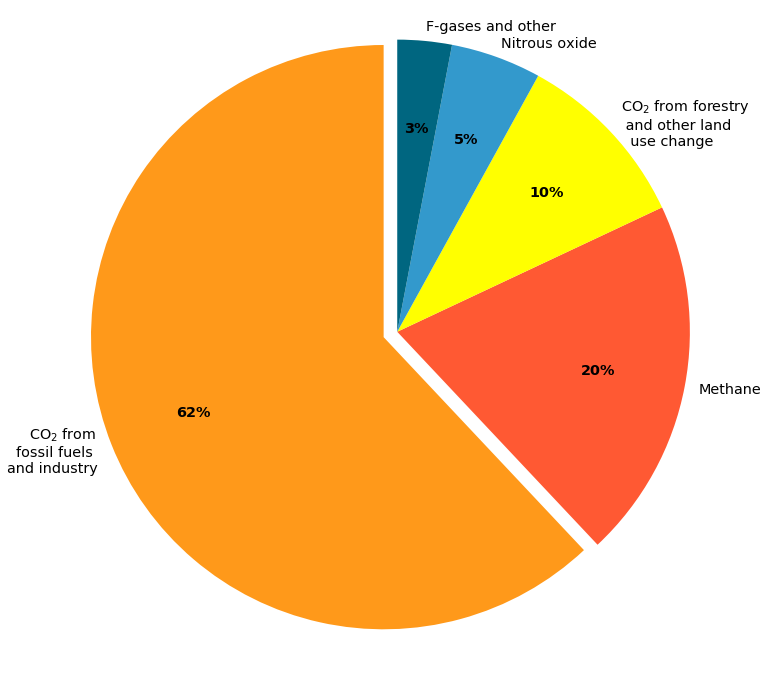

In [24]:
#Was it justified to only look at CO2 emissions from fossil fuels and industry?
#data from IPPC fifth assesment report figure 1.6. GWP100 AR5

from matplotlib import font_manager as fm

#Define lables and data. Explode the portion we are interested in. 
labels = '$\mathregular{CO_{2}}$ from \nfossil fuels \nand industry',  'Methane', '$\mathregular{CO_{2}}$ from forestry \n and other land \n  use change','Nitrous oxide', 'F-gases and other'
sizes = [62, 20, 10, 5, 3]
explode = (0.05, 0, 0, 0, 0)  

#set up the plot
fig_breakdown, ax_breakdown = plt.subplots()
patches, texts, autotexts = ax_breakdown.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90, pctdistance = 0.7 , labeldistance = 1.05,  colors = [(1,0.6,0.1),(1,0.35,0.2),(1,1,0),(0.2,0.6,0.8), (0,0.4,0.5)])
ax_breakdown.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


proptease_percents = fm.FontProperties(weight = 'bold')
proptease_percents.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease_percents)

proptease_labels = fm.FontProperties()
proptease_labels.set_size('x-large')
plt.setp(texts, fontproperties=proptease_labels)

#plt.savefig('CO2_equivalent_breakdown.png', dpi=50)

plt.show()

*Breakdown of anthropogenic greenhouse gas emissions (gigatonne of CO2-equivalent (GtCO2 eq) per year ) in 2010.   The equivalence of different greenhouse gases is based on their 100 year global warming potential - as calculated in the IPCC's 5th Assessment report. Data is also from the IPCC's [latest report](https://www.ipcc.ch/pdf/assessment-report/ar5/syr/SYR_AR5_FINAL_full_wcover.pdf). Note that there are very large uncertainties about CO2 emissions due to forestry and other land use change.*

CO2 emissions from fossil fuels and industry form the majority of anthropogenic greenhouse gas emissions.  Methane emissions and CO2 emissions from land-use change are also significant contributors and it would be interesting to see how they are evolving. In the absence of up to date emissions data however,  I think it's reasonable to neglect them and focus instead on the biggest factor. 